In [16]:
from manim import *

Manim Community v0.18.0

In [17]:
%%manim -ql -v WARNING SnellsLawScene
from manim import *

class SnellsLawScene(Scene):
    def construct(self):
        # Erstellen des blauen Körpers
        blue_body = Rectangle(width=config.frame_width, height=config.frame_height / 2, color=BLUE)
        blue_body.shift(DOWN * config.frame_height / 4)

        # Erstellen des Lichtstrahls
        light_ray_start = UP * config.frame_height / 2
        light_ray_end = ORIGIN
        light_ray = Line(light_ray_start, light_ray_end, color=YELLOW)

        # Lichtstrahl-Umlenkung nach Snells Gesetz
        # Verwenden Sie den richtigen Brechungsindex für realistischere Effekte
        refracted_ray_direction = self.refract(light_ray.get_vector(), n1=1, n2=1.5)
        refracted_ray = Line(light_ray_end, light_ray_end + refracted_ray_direction, color=YELLOW)

        self.play(Create(blue_body))
        self.play(Create(light_ray))
        self.play(Transform(light_ray, refracted_ray))
        self.wait()

    def refract(self, incoming, n1, n2):
        # Implementierung der Umlenkungsberechnung nach Snells Gesetz
        # Diese einfache Implementierung dient nur der Veranschaulichung
        angle_of_incidence = np.arccos(incoming[1] / np.linalg.norm(incoming))
        angle_of_refraction = np.arcsin(n1 / n2 * np.sin(angle_of_incidence))
        return np.array([np.sin(angle_of_refraction), -np.cos(angle_of_refraction), 0])



In [18]:
%%manim -ql -v WARNING SnellsLawScene2
from manim import *

class SnellsLawScene2(Scene):
    def construct(self):
        # Erstellen des blauen Körpers
        blue_body = Rectangle(width=config.frame_width, height=config.frame_height / 2, color=BLUE)
        blue_body.shift(DOWN * config.frame_height / 4)

        # Erstellen des ersten Lichtstrahls
        light_ray_start = UP * config.frame_height / 2
        light_ray_end = ORIGIN
        light_ray = Line(light_ray_start, light_ray_end, color=YELLOW)

        # Berechnung der neuen Richtung nach Brechung
        refracted_ray_direction = self.refract_at_angle(light_ray.get_vector(), angle=30 * DEGREES)
        refracted_ray_start = light_ray_end
        refracted_ray_end = refracted_ray_start + refracted_ray_direction
        refracted_ray = Line(refracted_ray_start, refracted_ray_end, color=YELLOW)

        # Erstellen des zweiten Lichtstrahls innerhalb des blauen Körpers
        internal_ray = Line(refracted_ray_end, refracted_ray_end + 3 * RIGHT, color=YELLOW)

        self.play(Create(blue_body))
        self.play(Create(light_ray))
        self.wait(1)
        self.play(Create(refracted_ray))
        self.wait(1)
        self.play(Create(internal_ray))
        self.wait()

    def refract_at_angle(self, incoming, angle):
        direction = rotate_vector(incoming, angle)
        return direction

if __name__ == "__main__":
    scene = SnellsLawScene()
    scene.render()



In [19]:
%%manim -ql -v WARNING SnellsLawScene3


class SnellsLawScene3(Scene):
    def construct(self):
        # Erstellen des blauen Körpers mit Füllung
        blue_body = Rectangle(width=config.frame_width, height=config.frame_height / 2, fill_color=BLUE, fill_opacity=1.0)
        blue_body.shift(DOWN * config.frame_height / 4)

        # Erstellen des ersten Lichtstrahls
        light_ray_start = UP * config.frame_height / 2
        light_ray_end = ORIGIN
        light_ray = Line(light_ray_start, light_ray_end, color=YELLOW)

        # Berechnung der neuen Richtung nach Brechung
        refracted_ray_direction = self.refract_at_angle(light_ray.get_vector(), angle=30 * DEGREES)
        refracted_ray_start = light_ray_end
        refracted_ray_end = refracted_ray_start + refracted_ray_direction
        refracted_ray = Line(refracted_ray_start, refracted_ray_end, color=YELLOW)

        # Erstellen des zweiten Lichtstrahls innerhalb des blauen Körpers
        internal_ray = Line(refracted_ray_end, refracted_ray_end + 3 * RIGHT, color=YELLOW)

        self.play(Create(blue_body))
        self.play(Create(light_ray))
        self.wait(1)
        self.play(Create(refracted_ray))
        self.wait(1)
        self.play(Create(internal_ray))
        self.wait()

    def refract_at_angle(self, incoming, angle):
        direction = rotate_vector(incoming, angle)
        return direction




In [20]:
%%manim -ql -v WARNING BrachistochroneCurve
from manim import *

class BrachistochroneCurve(Scene):
    def construct(self):
        # Anfangs- und Endpunkt definieren
        start_point = 2 * UP + LEFT *4
        end_point = 2 * DOWN + 4 * LEFT  # Verschiebe den Endpunkt weiter nach links

        # Den Abstand und den Winkel zwischen den Punkten berechnen
        dist = np.linalg.norm(start_point - end_point)
        angle = np.arctan2(*(end_point - start_point)[1::-1])

        # Radius basierend auf der Distanz berechnen
        r = dist / (2 * np.pi)  # Einen vollen Zyklus für die Kurve verwenden

        # Parametrische Funktion für die Brachistochrone
        brachistochrone_curve = ParametricFunction(
            lambda t: r * np.array([
                t - np.sin(t),
                -(1 - np.cos(t)),
                0
            ]),
            t_range=[0, 2 * np.pi],
            color=RED
        )

        # Skalieren und Drehen der Kurve
        brachistochrone_curve.scale(2)
        
        print(dist / (2 * np.pi * r))
        brachistochrone_curve.rotate(np.radians(-20))

        # Verschiebung der Kurve zum Startpunkt
        brachistochrone_curve.shift(start_point - brachistochrone_curve.get_start())

        # Zeichne nur die Brachistochrone-Kurve
        self.add(brachistochrone_curve)
        #self.play(Create(brachistochrone_curve), run_time=3)
        self.wait()




1.0


1.0


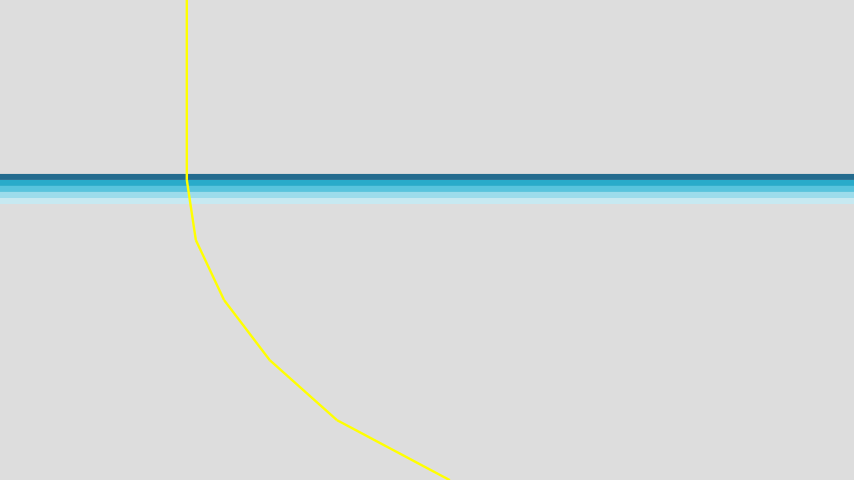

In [21]:
%%manim -ql -v WARNING LightScene

class LightScene(ZoomedScene):
    def construct(self):
        self.camera.background_color = GRAY_A
        box_height = config.frame_height / 8
        extra_width = 1000

        # Erstellen der Blauen Körper
        water1 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_A, fill_opacity=1.0,stroke_width=0)
        water1.shift(UP * box_height * (0 + 0.5 - 8 / 2))

        water2 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_B, fill_opacity=1.0,stroke_width=0)
        water2.shift(UP * box_height * (1 + 0.5 - 8 / 2))

        water3 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_C, fill_opacity=1.0,stroke_width=0)
        water3.shift(UP * box_height * (2 + 0.5 - 8 / 2))

        water4 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_D, fill_opacity=1.0,stroke_width=0)
        water4.shift(UP * box_height * (3 + 0.5 - 8 / 2))

        water5 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_E, fill_opacity=1.0,stroke_width=0)
        water5.shift(UP * box_height * (4 + 0.5 - 8 / 2))
        self.add(water1,water2,water3,water4,water5)

        #Erstellen einer Brachistachrone Kurve:
        # Anfangs- und Endpunkt definieren
        start_point = 1 * UP + LEFT *4
        end_point = 2 * DOWN + 4 * LEFT
        size = 4.5
        rotation = -10

        # Den Abstand und den Winkel zwischen den Punkten berechnen
        dist = np.linalg.norm(start_point - end_point)
        angle = np.arctan2(*(end_point - start_point)[1::-1])

        # Radius basierend auf der Distanz berechnen
        r = dist / (2 * np.pi)  # Einen vollen Zyklus für die Kurve verwenden
        # Parametrische Funktion für die Brachistochrone


        brachistochrone_curve = ParametricFunction(
            lambda t: r * np.array([
                t - np.sin(t),
                -(1 - np.cos(t)),
                0
            ]),
            t_range=[0, 2 * np.pi],
            color=YELLOW
        )
        # Skalieren und Drehen der Kurve
        brachistochrone_curve.scale(size)
        print(dist / (2 * np.pi * r))
        brachistochrone_curve.rotate(np.radians(rotation))
        # Verschiebung der Kurve zum Startpunkt
        brachistochrone_curve.shift(start_point - brachistochrone_curve.get_start())
        # Einfügen der Brahistachrone
        #self.add(brachistochrone_curve)


        # Jeden Schnittpunkt von Brachistachrone und rectangels bekommen
        entry_point0 = Dot(UP * 100 + LEFT *4)
        entry_point1 = Dot(point=1 * UP + LEFT *4)
        entry_point2 = Dot(point=water4.get_top()+ LEFT * 3.85)
        entry_point3 = Dot(point=water3.get_top()+ LEFT * 3.38)
        entry_point4 = Dot(point=water2.get_top()+ LEFT * 2.62)
        entry_point5 = Dot(point=water1.get_top()+ LEFT * 1.50)
        entry_point6 = Dot(point=water1.get_top() + DOWN * box_height + RIGHT * 0.38)
        #self.add(entry_point0,entry_point1,entry_point2,entry_point3,entry_point4,entry_point5,entry_point6)


        # Lichtstrahlen einzeichnen
        light_color = YELLOW
        strahl1 = Line(entry_point0.get_center(), entry_point1.get_center(), color = light_color)
        strahl2 = Line(entry_point1.get_center(), entry_point2.get_center(), color = light_color)
        strahl3 = Line(entry_point2.get_center(), entry_point3.get_center(), color = light_color)
        strahl4 = Line(entry_point3.get_center(), entry_point4.get_center(), color = light_color)
        strahl5 = Line(entry_point4.get_center(), entry_point5.get_center(), color = light_color)
        strahl6 = Line(entry_point5.get_center(), entry_point6.get_center(), color = light_color)

        self.add(strahl1,strahl2,strahl3,strahl4,strahl5,strahl6)

        
        additional_boxes = 5

        # Neue Höhe der Boxen berechnen
        new_box_height = box_height / (5 + additional_boxes)

        # Aktualisiere die Höhe und Position der vorhandenen Boxen
        last_pos = 0
        for i, water in enumerate([water1, water2, water3, water4, water5]):
            water.height = new_box_height
            water.shift(UP + UP * (new_box_height - box_height) * (i + 0.5 - 8 / 2))
            last_pos =  UP + UP * (new_box_height - box_height) * (i + 0.5 - 8 / 2)

        # Erstellen und Hinzufügen der neuen Boxen
        # for i in range(70):
        #     new_box = Rectangle(width=config.frame_width + 10, height=new_box_height, fill_color=BLUE_E, fill_opacity=1.0, stroke_width=1)
        #     new_box.shift( last_pos + DOWN * new_box_height * (5 + i - 8 / 2) + new_box_height)
        #     self.add(new_box)
        
        # self.remove(strahl2)
        # self.add(brachistochrone_curve)
        # self.play(self.camera.frame.animate.scale(1.2).shift(RIGHT * 2.7), run_time = 4 )
        # self.wait(4)

In [22]:
%%manim -ql -v WARNING SnellsLawStackedBoxesScene
from manim import *

class SnellsLawStackedBoxesScene(Scene):
    def construct(self):
        # Anzahl der Boxen und Einstellungen
        num_boxes = 20
        box_height = config.frame_height / num_boxes
        initial_angle = 0
        angle_increment = 5 * DEGREES  # Winkeländerung bei jedem Boxübergang

        # Erstellen des ersten Lichtstrahls
        light_ray_start = UP * config.frame_height / 2
        light_ray_end = light_ray_start

        for i in range(num_boxes):
            # Erstellen der Box
            box = Rectangle(width=config.frame_width, height=box_height, fill_color=BLUE, fill_opacity=1.0)
            box.shift(DOWN * box_height * (i + 0.5 - num_boxes / 2))
            self.add(box)

            # Aktualisierung des Lichtstrahls
            new_angle = initial_angle + i * angle_increment
            light_ray_end = light_ray_end + rotate_vector(DOWN * box_height, new_angle)
            light_ray = Line(light_ray_start, light_ray_end, color=YELLOW)
            self.add(light_ray)

        self.wait()

if __name__ == "__main__":
    scene = SnellsLawStackedBoxesScene()
    scene.render()


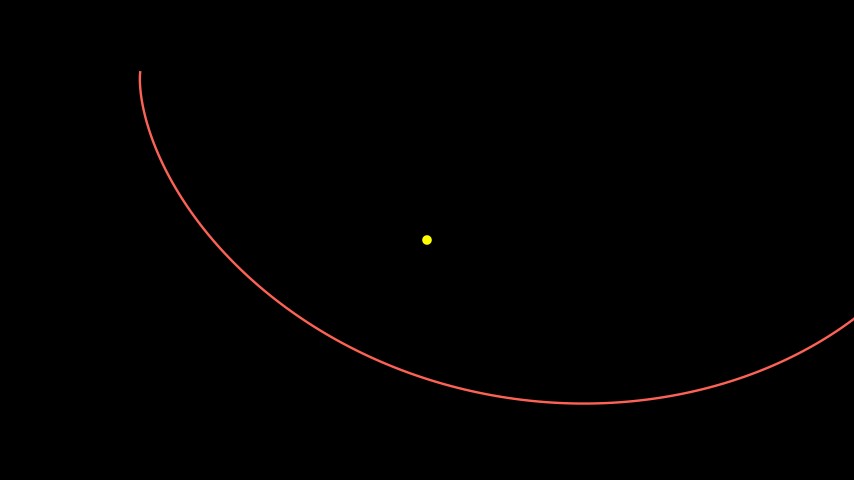

In [23]:
%%manim -ql -v WARNING PointOnBrachistochrone
from manim import *
import numpy as np

class PointOnBrachistochrone(Scene):
    def construct(self):
        # Gegebene Werte
        start_point = 1 * UP + LEFT * 4
        end_point = 2 * DOWN + 4 * LEFT
        size = 4.5
        rotation = -10

        # Brachistochrone-Kurve
        dist = np.linalg.norm(start_point - end_point)
        r = dist / (2 * np.pi)
        brachistochrone_curve = ParametricFunction(
            lambda t: r * np.array([
                t - np.sin(t),
                -(1 - np.cos(t)),
                0
            ]),
            t_range=[0, 2 * np.pi],
            color=RED
        )

        # Skalieren und Drehen der Kurve
        brachistochrone_curve.scale(size)
        brachistochrone_curve.rotate(np.radians(rotation))

        # Mitte des Frames (in Y-Richtung)
        frame_center_y = -10

        # Finde den passenden t-Wert für die gegebene Y-Position
        def find_t_for_y(y, precision=0.01):
            t_min, t_max = 0, 2 * np.pi
            while t_max - t_min > precision:
                t = (t_max + t_min) / 2
                _, y_val, _ = brachistochrone_curve.function(t)
                if y_val > y:
                    t_min = t
                else:
                    t_max = t
            return (t_max + t_min) / 2

        t_value = find_t_for_y(-frame_center_y / size)
        point_position = brachistochrone_curve.function(t_value)

        # Erstelle einen Punkt an dieser Position
        point = Dot(point=point_position, color=YELLOW)

        self.add(brachistochrone_curve,point)




In [24]:
%%manim -ql -v WARNING SizeAndPositionChange
from manim import *

class SizeAndPositionChange(Scene):
    def construct(self):
        # Create 10 rectangles and store them in a list
        rectangles = [Rectangle() for _ in range(10)]

        # Position rectangles in a row or grid for visibility
        self.add(*rectangles)
        self.play(*[rect.animate.shift(LEFT * 3 + RIGHT * i) for i, rect in enumerate(rectangles)])

        # Define the animations for each rectangle
        animations = []
        for i, rect in enumerate(rectangles):
            # Change the size of each rectangle
            new_width = 1 + 0.1 * i  # example width change
            new_height = 1 + 0.1 * i  # example height change
            animations.append(rect.animate.stretch_to_fit_width(new_width).stretch_to_fit_height(new_height))

        # Animate all changes simultaneously
        self.play(AnimationGroup(*animations))

        # Keep the scene still for a while after the animation
        self.wait(2)


In [25]:
%%manim -ql -v WARNING LightScene

class LightScene(ZoomedScene):
    def construct(self):
        self.camera.background_color = GRAY_A
        box_height = config.frame_height / 8
        extra_width = 1000

        # Erstellen der Blauen Körper
        water1 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_A, fill_opacity=1.0,stroke_width=0)
        water1.shift(UP * box_height * (0 + 0.5 - 8 / 2))

        water2 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_B, fill_opacity=1.0,stroke_width=0)
        water2.shift(UP * box_height * (1 + 0.5 - 8 / 2))

        water3 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_C, fill_opacity=1.0,stroke_width=0)
        water3.shift(UP * box_height * (2 + 0.5 - 8 / 2))

        water4 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_D, fill_opacity=1.0,stroke_width=0)
        water4.shift(UP * box_height * (3 + 0.5 - 8 / 2))

        water5 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_E, fill_opacity=1.0,stroke_width=0)
        water5.shift(UP * box_height * (4 + 0.5 - 8 / 2))
        self.add(water1,water2,water3,water4,water5)

        #Erstellen einer Brachistachrone Kurve:
        # Anfangs- und Endpunkt definieren
        start_point = 1 * UP + LEFT *4
        end_point = 2 * DOWN + 4 * LEFT
        size = 4.5
        rotation = -10

        # Den Abstand und den Winkel zwischen den Punkten berechnen
        dist = np.linalg.norm(start_point - end_point)
        angle = np.arctan2(*(end_point - start_point)[1::-1])

        # Radius basierend auf der Distanz berechnen
        r = dist / (2 * np.pi)  # Einen vollen Zyklus für die Kurve verwenden
        # Parametrische Funktion für die Brachistochrone


        brachistochrone_curve = ParametricFunction(
            lambda t: r * np.array([
                t - np.sin(t),
                -(1 - np.cos(t)),
                0
            ]),
            t_range=[0, 2 * np.pi],
            color=YELLOW
        )
        # Skalieren und Drehen der Kurve
        brachistochrone_curve.scale(size)
        print(dist / (2 * np.pi * r))
        brachistochrone_curve.rotate(np.radians(rotation))
        # Verschiebung der Kurve zum Startpunkt
        brachistochrone_curve.shift(start_point - brachistochrone_curve.get_start())
        # Einfügen der Brahistachrone
        #self.add(brachistochrone_curve)


        # Jeden Schnittpunkt von Brachistachrone und rectangels bekommen
        entry_point0 = Dot(UP * 100 + LEFT *4)
        entry_point1 = Dot(point=1 * UP + LEFT *4)
        entry_point2 = Dot(point=water4.get_top()+ LEFT * 3.85)
        entry_point3 = Dot(point=water3.get_top()+ LEFT * 3.38)
        entry_point4 = Dot(point=water2.get_top()+ LEFT * 2.62)
        entry_point5 = Dot(point=water1.get_top()+ LEFT * 1.50)
        entry_point6 = Dot(point=water1.get_top() + DOWN * box_height + RIGHT * 0.38)
        #self.add(entry_point0,entry_point1,entry_point2,entry_point3,entry_point4,entry_point5,entry_point6)


        # Lichtstrahlen einzeichnen
        light_color = YELLOW
        strahl1 = Line(entry_point0.get_center(), entry_point1.get_center(), color = light_color)
        strahl2 = Line(entry_point1.get_center(), entry_point2.get_center(), color = light_color)
        strahl3 = Line(entry_point2.get_center(), entry_point3.get_center(), color = light_color)
        strahl4 = Line(entry_point3.get_center(), entry_point4.get_center(), color = light_color)
        strahl5 = Line(entry_point4.get_center(), entry_point5.get_center(), color = light_color)
        strahl6 = Line(entry_point5.get_center(), entry_point6.get_center(), color = light_color)

        self.add(strahl1,strahl2,strahl3,strahl4,strahl5,strahl6)

        
        additional_boxes = 5

        # Neue Höhe der Boxen berechnen
        new_box_height = box_height / (5 + additional_boxes)

        # Aktualisiere die Höhe und Position der vorhandenen Boxen
        last_pos = 0
        waters = [water1, water2, water3, water4, water5]
        
        #Same time modification algorithm
        from functools import partial

        def modify_rect(obj, new_box_height, box_height, i, num_waters):
    # Change the size of the rectangle
    obj.stretch_to_fit_height(new_box_height)

    # Calculate the shift amount
    # Adjust this calculation based on your specific layout and desired effect
    vertical_spacing = 1  # This is the vertical spacing between rectangles, adjust as needed
    shift_amount = UP * vertical_spacing * (i - (num_waters - 1) / 2)

    # Change the position of the rectangle
    obj.shift(shift_amount)

    return obj

# Define the animations for the Water
animations = []
num_waters = len(waters)  # Get the number of water objects
for i, water in enumerate(waters):
    # Customize the function for each water object
    custom_modify_rect = partial(modify_rect, new_box_height=new_box_height, box_height=box_height, i=i, num_waters=num_waters)
    animation = ApplyFunction(custom_modify_rect, water)
    animations.append(animation)

# Play all animations at the same time
self.play(*animations)


            



        # Erstellen und Hinzufügen der neuen Boxen
        # for i in range(70):
        #     new_box = Rectangle(width=config.frame_width + 10, height=new_box_height, fill_color=BLUE_E, fill_opacity=1.0, stroke_width=1)
        #     new_box.shift( last_pos + DOWN * new_box_height * (5 + i - 8 / 2) + new_box_height)
        #     self.add(new_box)
        
        # self.remove(strahl2)
        # self.add(brachistochrone_curve)
        # self.play(self.camera.frame.animate.scale(1.2).shift(RIGHT * 2.7), run_time = 4 )
        # self.wait(4)

IndentationError: expected an indented block after function definition on line 95 (<string>, line 97)

In [26]:
class MoveToPosition(Animation):
    def __init__(self, mobject, new_position, **kwargs):
        super().__init__(mobject, **kwargs)
        self.new_position = new_position

    def interpolate_mobject(self, alpha):
        self.mobject.move_to(self.new_position)
    
    

In [27]:
%%manim -ql -v WARNING SizeAndPositionChange
from manim import *

class SizeAndPositionChange(Scene):
    def construct(self):
        # Create a rectangle
        rect = Rectangle()

        # Define the function for modifying the rectangle
        def modify_rect(obj):
            # Change the size of the rectangle
            obj.stretch_to_fit_height(2)
            obj.stretch_to_fit_width(3)

            # Change the position of the rectangle
            obj.move_to(RIGHT * 2 + UP * 2)

            return obj

        # Animate the modification of the rectangle
        self.play(ApplyFunction(modify_rect, rect))

        # Keep the scene still for a while after the animation
        self.wait(2)


In [30]:
%%manim -ql -v WARNING LightScene

class LightScene(ZoomedScene):
    def construct(self):
        self.camera.background_color = GRAY_A
        box_height = config.frame_height / 8
        extra_width = 1000

        # Erstellen der Blauen Körper
        water1 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_A, fill_opacity=1.0,stroke_width=0)
        water1.shift(UP * box_height * (0 + 0.5 - 8 / 2))

        water2 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_B, fill_opacity=1.0,stroke_width=0)
        water2.shift(UP * box_height * (1 + 0.5 - 8 / 2))

        water3 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_C, fill_opacity=1.0,stroke_width=0)
        water3.shift(UP * box_height * (2 + 0.5 - 8 / 2))

        water4 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_D, fill_opacity=1.0,stroke_width=0)
        water4.shift(UP * box_height * (3 + 0.5 - 8 / 2))

        water5 = Rectangle(width=config.frame_width + extra_width, height=box_height, fill_color=BLUE_E, fill_opacity=1.0,stroke_width=0)
        water5.shift(UP * box_height * (4 + 0.5 - 8 / 2))
        self.add(water1,water2,water3,water4,water5)

        #Erstellen einer Brachistachrone Kurve:
        # Anfangs- und Endpunkt definieren
        start_point = 1 * UP + LEFT *4
        end_point = 2 * DOWN + 4 * LEFT
        size = 4.5
        rotation = -10

        # Den Abstand und den Winkel zwischen den Punkten berechnen
        dist = np.linalg.norm(start_point - end_point)
        angle = np.arctan2(*(end_point - start_point)[1::-1])

        # Radius basierend auf der Distanz berechnen
        r = dist / (2 * np.pi)  # Einen vollen Zyklus für die Kurve verwenden
        # Parametrische Funktion für die Brachistochrone


        brachistochrone_curve = ParametricFunction(
            lambda t: r * np.array([
                t - np.sin(t),
                -(1 - np.cos(t)),
                0
            ]),
            t_range=[0, 2 * np.pi],
            color=YELLOW
        )
        # Skalieren und Drehen der Kurve
        brachistochrone_curve.scale(size)
        print(dist / (2 * np.pi * r))
        brachistochrone_curve.rotate(np.radians(rotation))
        # Verschiebung der Kurve zum Startpunkt
        brachistochrone_curve.shift(start_point - brachistochrone_curve.get_start())
        # Einfügen der Brahistachrone
        #self.add(brachistochrone_curve)


        # Jeden Schnittpunkt von Brachistachrone und rectangels bekommen
        entry_point0 = Dot(UP * 100 + LEFT *4)
        entry_point1 = Dot(point=1 * UP + LEFT *4)
        entry_point2 = Dot(point=water4.get_top()+ LEFT * 3.85)
        entry_point3 = Dot(point=water3.get_top()+ LEFT * 3.38)
        entry_point4 = Dot(point=water2.get_top()+ LEFT * 2.62)
        entry_point5 = Dot(point=water1.get_top()+ LEFT * 1.50)
        entry_point6 = Dot(point=water1.get_top() + DOWN * box_height + RIGHT * 0.38)
        #self.add(entry_point0,entry_point1,entry_point2,entry_point3,entry_point4,entry_point5,entry_point6)


        # Lichtstrahlen einzeichnen
        light_color = YELLOW
        strahl1 = Line(entry_point0.get_center(), entry_point1.get_center(), color = light_color)
        strahl2 = Line(entry_point1.get_center(), entry_point2.get_center(), color = light_color)
        strahl3 = Line(entry_point2.get_center(), entry_point3.get_center(), color = light_color)
        strahl4 = Line(entry_point3.get_center(), entry_point4.get_center(), color = light_color)
        strahl5 = Line(entry_point4.get_center(), entry_point5.get_center(), color = light_color)
        strahl6 = Line(entry_point5.get_center(), entry_point6.get_center(), color = light_color)

        #self.add(strahl1,strahl2,strahl3,strahl4,strahl5,strahl6)

        for strahl in [strahl1,strahl2,strahl3,strahl4,strahl5,strahl6]:
            self.play(Create(strahl)) 

        
        

1.0


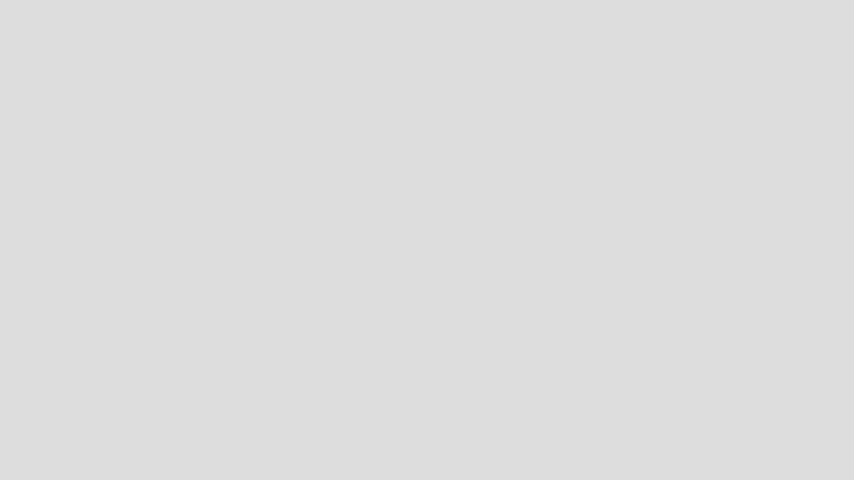

In [41]:
%%manim -ql -v WARNING LightScene

class LightScene(ZoomedScene):
    def construct(self):
        self.camera.background_color = GRAY_A


        box_number = 2
        box_height = config.frame_height / 2

        def Create_Box ():


            # Erstellen der Blauen Körper
            water1 = Rectangle(width=config.frame_width + 1000, height=box_height, fill_color=BLUE, fill_opacity=1.0,stroke_width=0)
            water1.shift(UP * box_height * (0 + 0.5 - 8 / 2))

            self.add(water1)

        Create_Box()

    


        
        

In [250]:
%%manim -ql -v WARNING BlaueBoxenSzene

class BlaueBoxenSzene(Scene):
    def construct(self):
        self.camera.background_color = GRAY_A

        liste_boxen_liste = []

        for box_anzahl in range(2,10):
            farben = self.generiere_blaue_farbverlauf_liste(box_anzahl)
            box_height = self.berechne_box_hoehe(box_anzahl)
            boxen = self.erstelle_boxen(box_height,box_anzahl,farben,[])
            liste_boxen_liste.append(boxen)

        for boxen in liste_boxen_liste:
            self.play(AnimationGroup(*[Create(box) for box in boxen], run_time=0.1))


    def berechne_box_hoehe(self, anzahl_boxen):
        screen_hoehe = config.frame_height  # Die Höhe des Bildschirms in Manim Einheiten
        box_hoehe = (2 * screen_hoehe / 3) / anzahl_boxen  # Höhe jeder Box
        #print(box_hoehe)
        return box_hoehe


    def generiere_blaue_farbverlauf_liste(self, laenge):
        # Definiere die RGB-Werte für helles und dunkles Blau
        start_rgb = (173, 216, 230)  # Helles Blau, z.B. #ADD8E6
        ende_rgb = (0, 0, 139)  # Dunkles Blau, z.B. #00008B

        # Generiere den Farbverlauf
        farbverlauf_liste = []
        for i in range(laenge):
            # Berechne die interpolierten RGB-Werte
            zwischen_rgb = tuple(start + (end - start) * i / (laenge - 1) for start, end in zip(start_rgb, ende_rgb))
            # Konvertiere die RGB-Werte zu einem Hex-String und füge sie der Liste hinzu
            farbverlauf_liste.append('#{:02X}{:02X}{:02X}'.format(int(zwischen_rgb[0]), int(zwischen_rgb[1]), int(zwischen_rgb[2])))

        return farbverlauf_liste


    def erstelle_boxen(self, box_hoehe, box_anzahl, farbverlauf_liste, box_liste, box_num = 0):
        if box_num != box_anzahl:
            box = Rectangle(width=config.frame_width * 3, height=box_hoehe, fill_color=farbverlauf_liste[box_num], fill_opacity=1.0, stroke_width=3, color=farbverlauf_liste[box_num])
            #Box am unteren rand des Bildschirms platzieren
            box.to_edge(DOWN, buff=0)
            #Box nach nummer der box multipliziert mit der Höhe der box nach oben verschieben, also um so viele box einheiten wie nummern
            box.shift(UP * box_num * box_hoehe)
            box_num += 1
            box_liste.append(box)
            #self.add(box)
            return self.erstelle_boxen(box_hoehe = box_hoehe, box_anzahl = box_anzahl, farbverlauf_liste = farbverlauf_liste, box_liste = box_liste, box_num = box_num)
        else:
            return box_liste


In [257]:
%%manim -ql -v WARNING BlaueBoxenSzene

class BlaueBoxenSzene(Scene):
    def berechne_box_hoehe(self, anzahl_boxen):
        screen_hoehe = config.frame_height  # Die Höhe des Bildschirms in Manim Einheiten
        box_hoehe = (2 * screen_hoehe / 3) / anzahl_boxen  # Höhe jeder Box
        #print(box_hoehe)
        return box_hoehe


    def generiere_blaue_farbverlauf_liste(self, laenge):
        # Definiere die RGB-Werte für helles und dunkles Blau
        start_rgb = (173, 216, 230)  # Helles Blau, z.B. #ADD8E6
        ende_rgb = (0, 0, 139)  # Dunkles Blau, z.B. #00008B

        # Generiere den Farbverlauf
        farbverlauf_liste = []
        for i in range(laenge):
            # Berechne die interpolierten RGB-Werte
            zwischen_rgb = tuple(start + (end - start) * i / (laenge - 1) for start, end in zip(start_rgb, ende_rgb))
            # Konvertiere die RGB-Werte zu einem Hex-String und füge sie der Liste hinzu
            farbverlauf_liste.append('#{:02X}{:02X}{:02X}'.format(int(zwischen_rgb[0]), int(zwischen_rgb[1]), int(zwischen_rgb[2])))

        return farbverlauf_liste


    def erstelle_boxen(self, box_hoehe, box_anzahl, farbverlauf_liste, box_liste, box_num = 0):
        if box_num != box_anzahl:
            box = Rectangle(width=config.frame_width * 3, height=box_hoehe, fill_color=farbverlauf_liste[box_num], fill_opacity=1.0, stroke_width=3, color=farbverlauf_liste[box_num])
            #Box am unteren rand des Bildschirms platzieren
            box.to_edge(DOWN, buff=0)
            #Box nach nummer der box multipliziert mit der Höhe der box nach oben verschieben, also um so viele box einheiten wie nummern
            box.shift(UP * box_num * box_hoehe)
            box_num += 1
            box_liste.append(box)
            #self.add(box)
            return self.erstelle_boxen(box_hoehe = box_hoehe, box_anzahl = box_anzahl, farbverlauf_liste = farbverlauf_liste, box_liste = box_liste, box_num = box_num)
        else:
            return box_liste 

    def zeichne_brachistochrone(self):
        start_point = 2 * UP + LEFT *4
        end_point = 2 * DOWN + 4 * LEFT  # Verschiebe den Endpunkt weiter nach links

        # Den Abstand und den Winkel zwischen den Punkten berechnen
        dist = np.linalg.norm(start_point - end_point)
        angle = np.arctan2(*(end_point - start_point)[1::-1])

        # Radius basierend auf der Distanz berechnen
        r = dist / (2 * np.pi)  # Einen vollen Zyklus für die Kurve verwenden

        # Parametrische Funktion für die Brachistochrone
        brachistochrone_curve = ParametricFunction(
            lambda t: r * np.array([
                t - np.sin(t),
                -(1 - np.cos(t)),
                0
            ]),
            t_range=[0, 2 * np.pi],
            color=RED
        )

        # Skalieren und Drehen der Kurve
        brachistochrone_curve.scale(2)
        
        print(dist / (2 * np.pi * r))
        brachistochrone_curve.rotate(np.radians(-20))

        # Verschiebung der Kurve zum Startpunkt
        brachistochrone_curve.shift(start_point - brachistochrone_curve.get_start())

        # Zeichne nur die Brachistochrone-Kurve
        return brachistochrone_curve


    def construct(self):
        self.camera.background_color = GRAY_A

        liste_boxen_liste = []
        boxen_anzahl = 9

        brachistochrone_curve = self.zeichne_brachistochrone()
        brachistochrone_curve.shift(DOWN * 0.65)

        for box_anzahl in range(9,10):
            farben = self.generiere_blaue_farbverlauf_liste(box_anzahl)
            box_height = self.berechne_box_hoehe(box_anzahl)
            boxen = self.erstelle_boxen(box_height,box_anzahl,farben,[])
            liste_boxen_liste.append(boxen)

        for boxen in liste_boxen_liste:
            self.play(AnimationGroup(*[Create(box) for box in boxen], run_time=0.1))

        self.add(brachistochrone_curve)

        self.wait(2)


1.0
